

# Project: Investigate a Dataset - [Database_No_show_appointments_IN_Brazil]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 



### Question(s) for Analysis
### We  answer many questions.

#### 1- Did the patients receive SMS_keep their appointment?
#### 2- Which location has higher appointments  no show?
#### 3-which age has a top freq for no show?



In [1]:
# import pakges
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#  the data shape
df.shape

(110527, 14)

In [6]:
# check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

there are no missing value

In [7]:
# check  null_values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

there are no null values


### Data Cleaning


### Drop Patient_id , Appointment_id

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### convert some object to datetime 

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### Check  missing data


In [10]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
#check duplicated
df.duplicated().sum()

635

 ### check for duplicated and drop it

In [12]:
df.drop_duplicates(inplace=True)

check the age  

In [13]:
df[df["Age"] < 0].shape[0]

1

In [14]:
df.drop(df[df["Age"] < 0].index, inplace=True)

In [15]:
# Check the Scheduled Day is unique ??
df.ScheduledDay.nunique()

103548

almost all the dates are unique 

In [16]:
# Check the AppointmentDay  is unique ??
df.AppointmentDay.nunique()

27

 i need to do alot of analysis before enrich the data

In [17]:
#Extract (Year, Month, Week, Day, and Hour from ScheduledDay)
df["ScheduledDayYear"] = df.ScheduledDay.dt.year
df['ScheduledDayMonth']= df.ScheduledDay.dt.month
df['ScheduledDayWeek']= df.ScheduledDay.dt.week
df['ScheduledDayDay']= df.ScheduledDay.dt.day
df['ScheduledDayHour']= df.ScheduledDay.dt.hour

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Replace this header name!)

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDayYear,ScheduledDayMonth,ScheduledDayWeek,ScheduledDayDay,ScheduledDayHour
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884,2015.999436,4.825200,18.750198,14.249939,10.772975
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581,0.023746,0.715768,2.803226,9.348329,3.217516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,17.000000,6.000000,8.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,19.000000,13.000000,10.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,20.000000,22.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.000000,12.000000,51.000000,31.000000,21.000000


### Research Question 2  (Replace this header name!)

In [19]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 17 columns):
Gender               109891 non-null object
ScheduledDay         109891 non-null datetime64[ns]
AppointmentDay       109891 non-null datetime64[ns]
Age                  109891 non-null int64
Neighbourhood        109891 non-null object
Scholarship          109891 non-null int64
Hipertension         109891 non-null int64
Diabetes             109891 non-null int64
Alcoholism           109891 non-null int64
Handcap              109891 non-null int64
SMS_received         109891 non-null int64
No-show              109891 non-null object
ScheduledDayYear     109891 non-null int64
ScheduledDayMonth    109891 non-null int64
ScheduledDayWeek     109891 non-null int64
ScheduledDayDay      109891 non-null int64
ScheduledDayHour     109891 non-null int64
dtypes: datetime64[ns](2), int64(12), object(3)
memory usage: 15.1+ MB


In [20]:
df.ScheduledDayYear.value_counts()

2016    109829
2015        62
Name: ScheduledDayYear, dtype: int64

 alot of appointments were scheduled for  2016 with  62 appointments for 2015.

In [21]:
df.ScheduledDayMonth.value_counts()

5     67074
4     25120
6     13716
3      3579
2       280
12       61
1        60
11        1
Name: ScheduledDayMonth, dtype: int64

In [22]:
df.ScheduledDayYear.nunique()

2

In [23]:
df.ScheduledDayMonth.nunique()

8

In [24]:
df.ScheduledDayMonth.describe()

count    109891.000000
mean          4.825200
std           0.715768
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max          12.000000
Name: ScheduledDayMonth, dtype: float64

 month April&May has the most appointments.

In [25]:
df.ScheduledDayYear.describe()

count    109891.000000
mean       2015.999436
std           0.023746
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2016.000000
max        2016.000000
Name: ScheduledDayYear, dtype: float64

In [26]:
df.ScheduledDayDay.describe()

count    109891.000000
mean         14.249939
std           9.348329
min           1.000000
25%           6.000000
50%          13.000000
75%          22.000000
max          31.000000
Name: ScheduledDayDay, dtype: float64

In [27]:
df.ScheduledDayHour.describe()

count    109891.000000
mean         10.772975
std           3.217516
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: ScheduledDayHour, dtype: float64

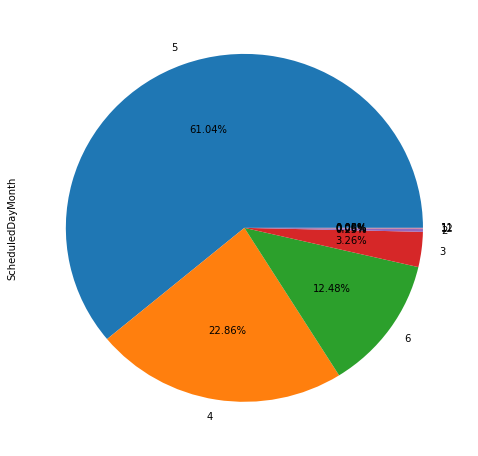

In [28]:
df.ScheduledDayMonth.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8));

 this pie chart with the percentage to show the data of months


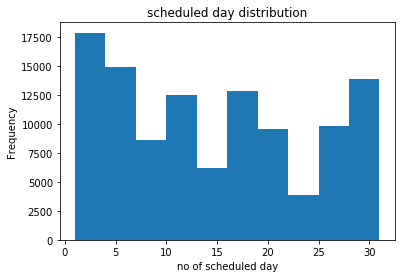

In [29]:
df.ScheduledDayDay.plot(kind='hist',title= 'scheduled day distribution')
plt.xlabel('no of scheduled day');

 day is not skewed and high dimensional

Text(0.5,0,'scheduled month')

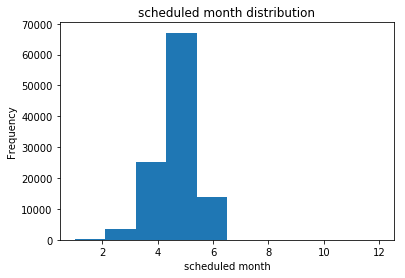

In [30]:
df.ScheduledDayMonth.plot(kind='hist',title= 'scheduled month distribution')
plt.xlabel('scheduled month')

histgram show the distribution of scheduled month

Text(0.5,0,'no of scheduled hour')

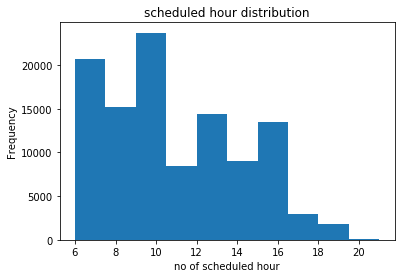

In [31]:
df.ScheduledDayHour.plot(kind='hist',title= 'scheduled hour distribution')
plt.xlabel('no of scheduled hour')

 the hour is skewed to the right.

In [32]:
def show_distribution(df, colName, Title):
    df[colName].value_counts().plot(kind='bar', title=Title)

Text(0.5,0,'no of Hipertension')

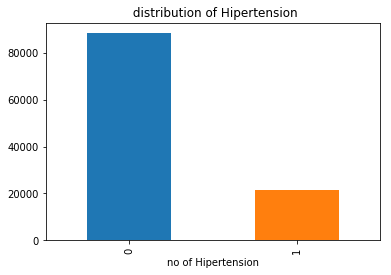

In [33]:
show_distribution(df, 'Hipertension', ' distribution of Hipertension')
plt.xlabel('no of Hipertension')

histgram show the distribution of Hipertension

Text(0.5,0,'no of Alcoholism')

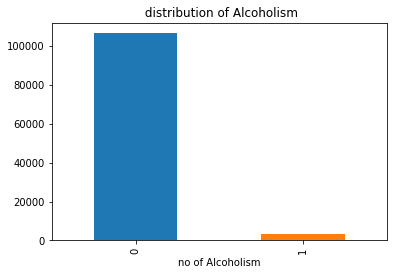

In [34]:
show_distribution(df, 'Alcoholism', ' distribution of Alcoholism')
plt.xlabel('no of Alcoholism')

histgram show the distribution of Alcoholism

Text(0.5,0,'no of Handcap')

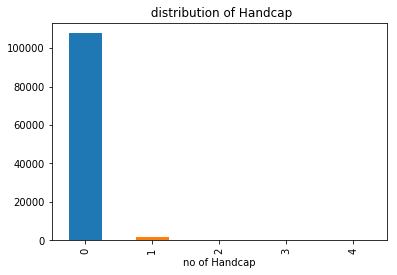

In [35]:
show_distribution(df, 'Handcap', ' distribution of Handcap')
plt.xlabel('no of Handcap')

histgram show the distribution of Handcap

Text(0.5,0,'no of Diabetes')

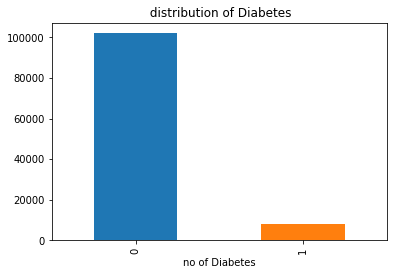

In [36]:
show_distribution(df, 'Diabetes', ' distribution of Diabetes')
plt.xlabel('no of Diabetes')

histgram show the distribution of Diabetes


Text(0.5,0,'no of SMS_received')

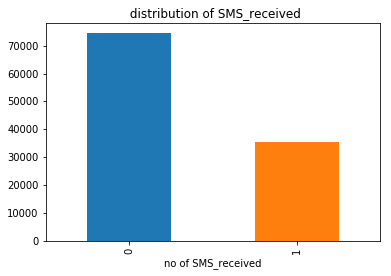

In [37]:
show_distribution(df, 'SMS_received', ' distribution of SMS_received')
plt.xlabel('no of SMS_received')

histgram show the distribution of SMS_received


Text(0.5,0,'no of Scholarship')

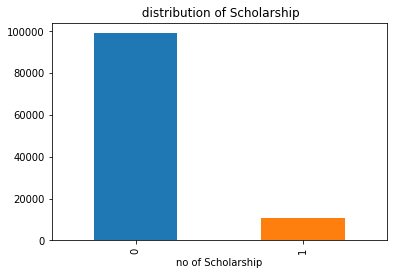

In [38]:
show_distribution(df, 'Scholarship', ' distribution of Scholarship')
plt.xlabel('no of Scholarship')

histgram show the distribution of Scholarship


Text(0.5,0,'no of No_show')

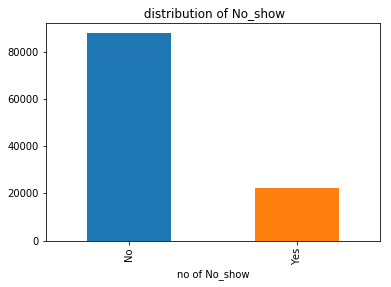

In [39]:
show_distribution(df, 'No-show', ' distribution of No_show')
plt.xlabel('no of No_show')

histgram show the distribution of No_show


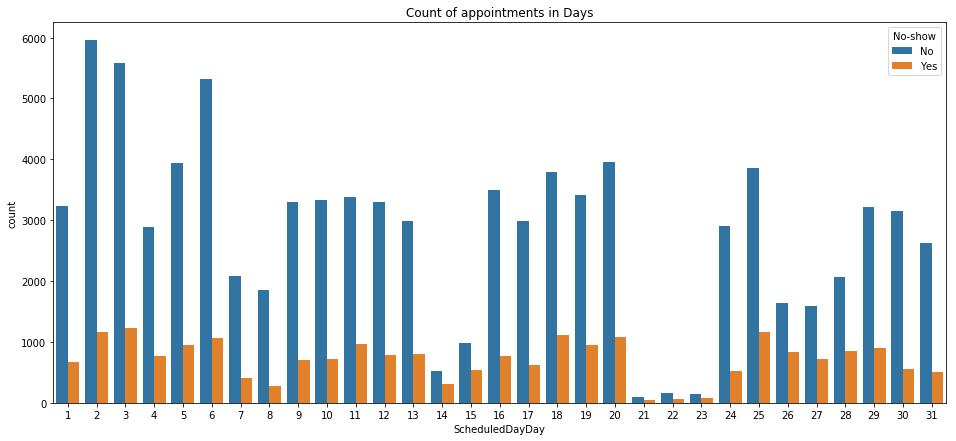

In [40]:
plt.figure(figsize=(16,7))
plt.title('Count of appointments in Days')
sns.countplot(x=df['ScheduledDayDay'], data=df ,hue='No-show')

Days from 21 to 23 was the least days in appointments made through

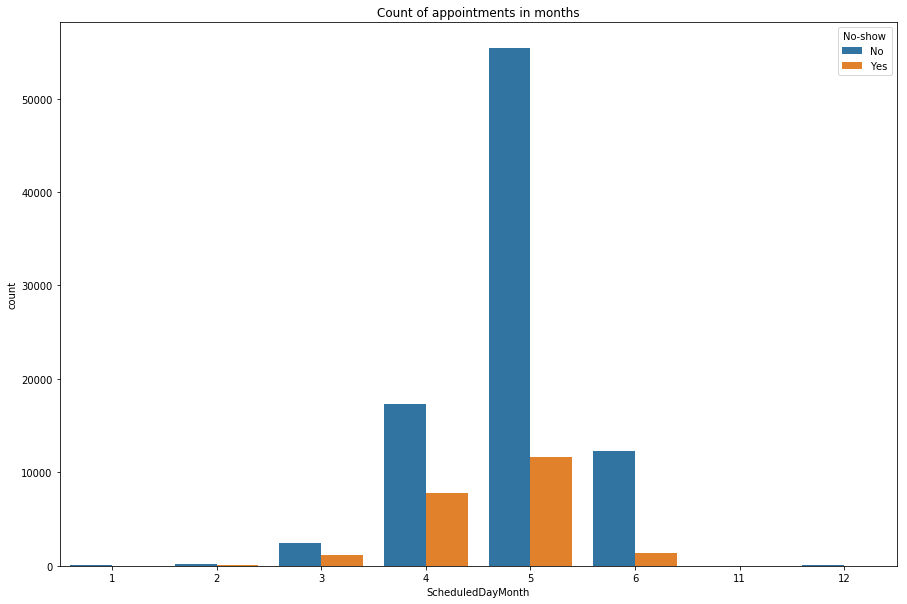

In [41]:
plt.figure(figsize=(15,10))
plt.title('Count of appointments in months')
sns.countplot(x=df['ScheduledDayMonth'], data=df ,hue='No-show')

month 4 and 5 were the most appointments made in the year.

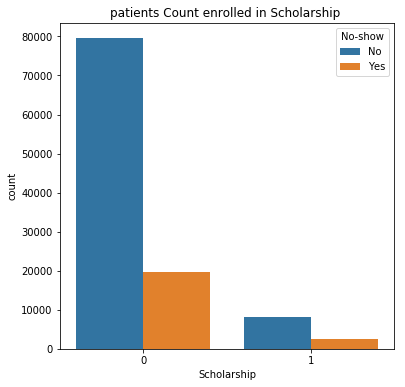

In [42]:
plt.figure(figsize=(6,6))
plt.title('patients Count enrolled in Scholarship ')
sns.countplot(x=df['Scholarship'], data=df ,hue='No-show')


people that are not enrolled in  Brazil schoolarship has appointments and does show up for appointments

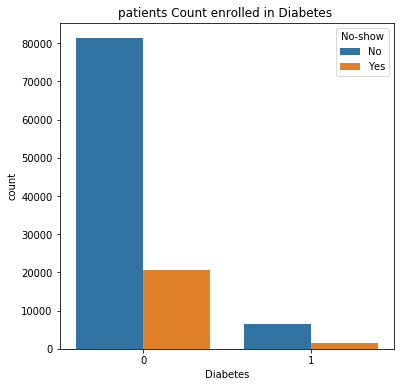

In [43]:
plt.figure(figsize=(6,6))
plt.title('patients Count enrolled in Diabetes ')
sns.countplot(x=df['Diabetes'], data=df ,hue='No-show')

people that are not enrolled in  Brazil Diabetes has appointments and does show up for appointments

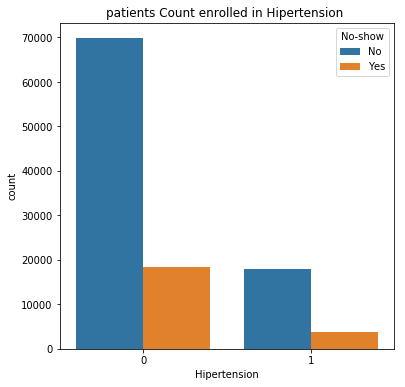

In [44]:
plt.figure(figsize=(6,6))
plt.title('patients Count enrolled in Hipertension ')
sns.countplot(x=df['Hipertension'], data=df ,hue='No-show')

people that are not enrolled in  Brazil Hipertension has appointments and does show up for appointments

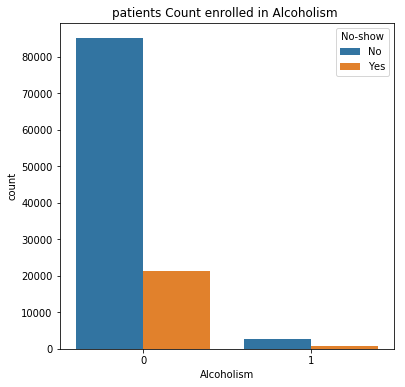

In [45]:
plt.figure(figsize=(6,6))
plt.title('patients Count enrolled in Alcoholism ')
sns.countplot(x=df['Alcoholism'], data=df ,hue='No-show')

people that are not enrolled in  Brazil Alcoholism has appointments and does show up for appointments

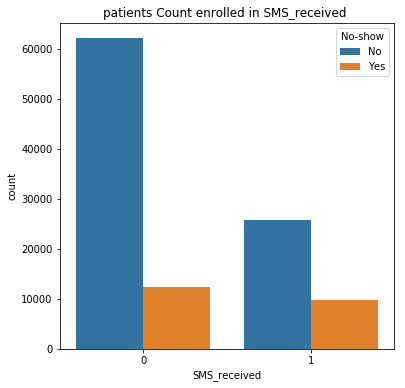

In [46]:
plt.figure(figsize=(6,6))
plt.title('patients Count enrolled in SMS_received ')
sns.countplot(x=df['SMS_received'], data=df ,hue='No-show')

SMS doesn't affect to increase patients show up

### which age has a high frequency for no show?

Text(0.5,0,'Patients Number')

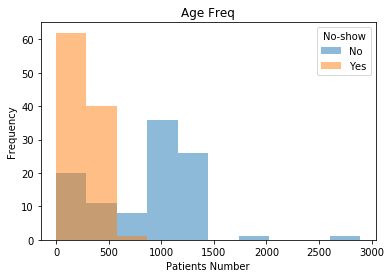

In [47]:
pd.crosstab(df['Age'],df['No-show']).plot(kind='hist',alpha=0.5);
plt.title('Age Freq')
plt.xlabel('Patients Number')

plot for sge has a high frequency 

In [48]:
df[df['No-show'] == 'No']['Age'].median()

38.0

### Which location has higher appointments with no show?


In [49]:
countryorder = df['Neighbourhood'].value_counts().index

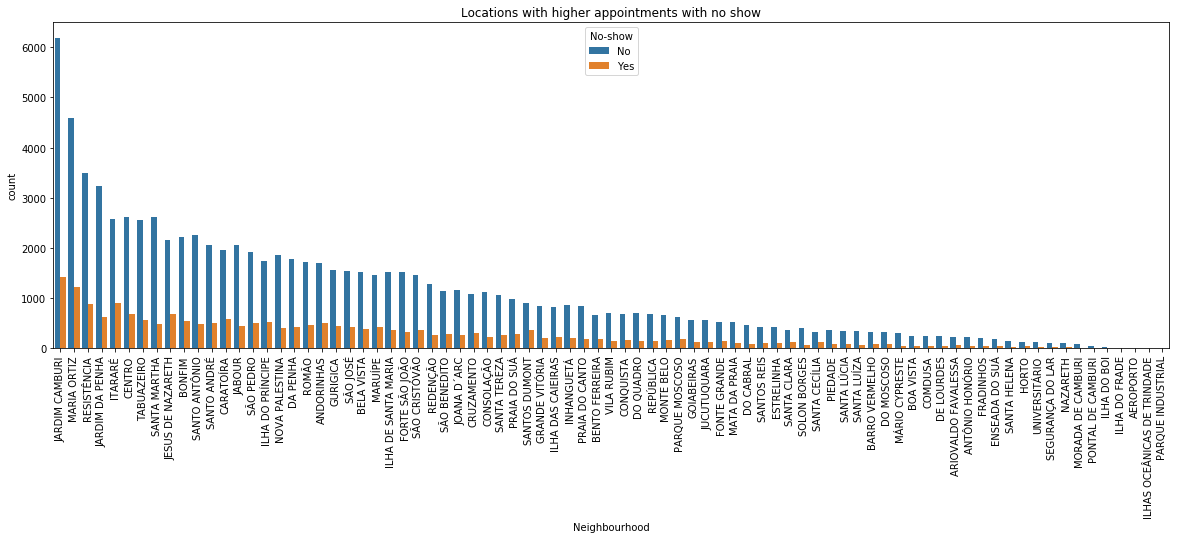

In [50]:
plt.figure(figsize=(20,6))
plt.title('Locations with higher appointments with no show')
plt.xticks(rotation=90)
sns.countplot(x=df['Neighbourhood'], data=df, hue='No-show', order=countryorder);

This means that high patients appointments comes from JARDIM CAMBURI




<a id='conclusions'></a>
## Conclusions

 analysis has as purpose to masuare an analysis of a database of medical_consultations 
 contain more than 100000 appointments in Brazil 
 try to investgate show up patients appointment using expolere dataset  and eda

### Limitations

#### problem in the dataset :
#### we are working with easy data,  implies uncertainty different sample may lead to different results)
#### we find problem with the sample of data that we are working with (missing values)
#### Other limitations involve: (problem with the ways of analysis)
#### 1-  a type of analysis that we would like to perform is not possible due to data limitations.
#### 2- we have not done any statistical tests in this analysis, we can not imply any statistical conclusions as well as we can not imply any causation from our correlation findings.

